# [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!

Used code and methods from the following article(s) to help me put together this notebook.

Article 1:[Titanic Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial)

- Author - Alexis Cooke
- Apr 1, 2020
- Code: Within Article

Article 2: [Bayesian Linear Regression in Python: Using Machine Learning to Predict Student Grades Part 1](https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-1-7d0ad817fca5)

- Author - Will Koehrsen
- Apr 20, 2018
- Code: [Github - Bayesian Linear Regression](https://github.com/WillKoehrsen/DataAnalysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb)

In [1]:
#source - https://www.kaggle.com/alexisbcook/titanic-tutorial
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [2]:
os.chdir(r'D:\python_code\Practice\Kaggle\Titanic')

In [3]:
df = pd.read_csv('train.csv')

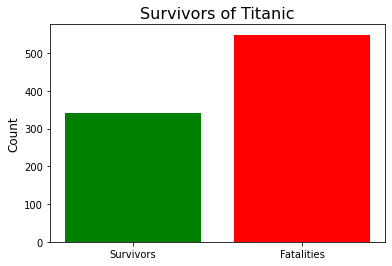

In [4]:
#df.plot.bar(y = df['Survived'])

survival = df['Survived'].values
survivors = np.count_nonzero(survival)
fatalities = len(survival) - survivors

plt.bar(height = [survivors,fatalities],x = ['Survivors','Fatalities'], color = ['Green','Red'])
plt.title('Survivors of Titanic', fontsize = 16)
plt.ylabel('Count', fontsize = 12);

In [5]:
# Suvived == 1 and Died == 0
# Survived is the target column

#add in dummy variables
#dummy variable for sex of the person
dummy_variable_sex = []

for i in df['Sex']:
    if i == 'male':
        dummy_variable_sex.append(0)
    else:
        dummy_variable_sex.append(1)

df['Dummy Variable Sex'] = dummy_variable_sex

#dummy variable where the passanger embarked from

#fill n/a values with 0, just 2 n/a values in Embarked and one in Fare
df['Embarked'] = df['Embarked'].fillna(0)
df['Fare'] = df['Fare'].fillna(0)


dummy_variable_embarked = []

#besides the n/a's there are 3 unique embark points: S, C and Q

for i in df['Embarked']:
    if i == 'S':
        dummy_variable_embarked.append(1)
    if i == 'C':
        dummy_variable_embarked.append(2)
    if i == 'Q':
        dummy_variable_embarked.append(3)
    if i == 0:
        dummy_variable_embarked.append(0)
        
df['Dummy Variable Embarked'] = dummy_variable_embarked


# The 3 most significant variables will be used for the model: Sex, Pclass and Fare

In [6]:
print(df.corr()['Survived'].sort_values())

#drop all features from DataFrame that won't be used in the model
df = df.drop(columns = ['Age','SibSp','PassengerId','Parch','Dummy Variable Embarked',
                  'Embarked','Name','Cabin','Ticket','Sex'])

Pclass                    -0.338481
Age                       -0.077221
SibSp                     -0.035322
PassengerId               -0.005007
Parch                      0.081629
Dummy Variable Embarked    0.101849
Fare                       0.257307
Dummy Variable Sex         0.543351
Survived                   1.000000
Name: Survived, dtype: float64


In [7]:
labels = df['Survived']

df_modded = df.drop(columns = ['Survived'])

X_train, X_test, y_train, y_test = train_test_split(df_modded, labels, test_size = 0.25)

# First Model is a Random Forest Classifier which is used in the [Kaggle Tutorial](https://www.kaggle.com/alexisbcook/titanic-tutorial)

In [8]:
model1 = RandomForestClassifier(n_estimators=100, max_depth=5)

In [9]:
#Will test model by running it 100 times to find the average score

test_list1 = []

while len(test_list1) < 100:
    model1.fit(X_train,y_train)
    test_list1.append(model1.score(X_test, y_test))
    model1.predict(X_test)

# The next model I found returned decent predictions was the [Multinomial Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Multinomial_na%C3%AFve_Bayes) which is used for Natual Language Processing

In [10]:
model2 = MultinomialNB()

In [11]:
test_list2 = []

while len(test_list2) < 100:
    X_train, X_test, y_train, y_test = train_test_split(df_modded, labels, test_size = 0.25)
    model2.fit(X_train,y_train)
    test_list2.append(model2.score(X_test, y_test))
    model2.predict(X_test)

In [12]:
#compare the results of each

average_random_f_score = sum(test_list1)/len(test_list1)
average_naive_b_score = sum(test_list2)/len(test_list2)

print(f'The average score for the Random Forest is: {average_random_f_score}\nThe average score for the Naive Bayes is: {average_naive_b_score}')

The average score for the Random Forest is: 0.8161883408071747
The average score for the Naive Bayes is: 0.6889686098654709


# The Random Forest seems to yield a better prediction rate, so it will be used to predict the test data

In [13]:
#same process for df_test

df_test = pd.read_csv('test.csv')

PassengerID = df_test['PassengerId'].values

dummy_variable_sex = []

for i in df_test['Sex']:
    if i == 'male':
        dummy_variable_sex.append(0)
    else:
        dummy_variable_sex.append(1)

df_test['Dummy Variable Sex'] = dummy_variable_sex

df_test = df_test.drop(columns = ['Age','SibSp','PassengerId','Parch',
                  'Embarked','Name','Cabin','Ticket','Sex'])

df_test['Fare'] = df_test['Fare'].fillna(0)

In [14]:
X_TRAIN = df_modded
X_TEST = df_test
Y_TRAIN = labels

model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model3.fit(X_TRAIN, Y_TRAIN)
predictions3 = model3.predict(X_TEST)

In [16]:
output = pd.DataFrame({'PassengerId': PassengerID, 'Survived': predictions3})
output.to_csv('my_submission.csv', index=False)

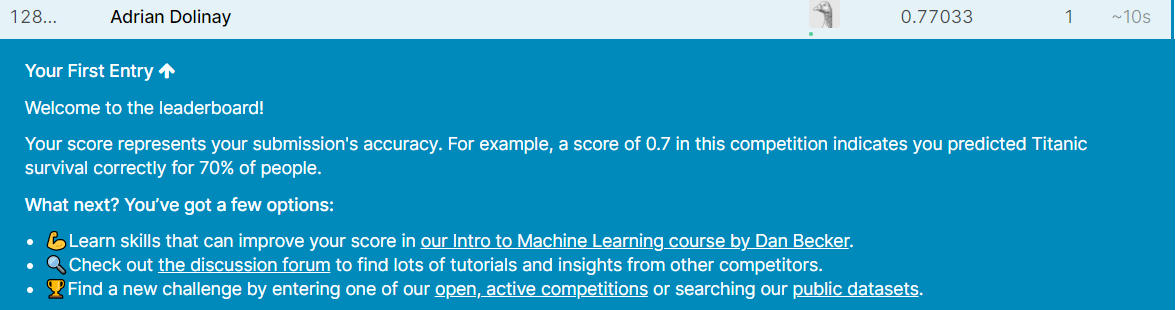